### Student Information
Name: 陳碩川

Student ID: 112352024

GitHub ID: AndyChen09230

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

## Part 2. Follow the same process from the DM2024-Lab1-Master on the new dataset

In [7]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [8]:
df

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

### **>>> Exercise 1:**  
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [10]:
# Display the text data for the first three samples
for text in df['comment'][:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


---

### Data Transformation

In [13]:
import pandas as pd

# Assuming 'df' contains the new dataset with columns 'comment' and 'sentiment'
# Construct a new DataFrame using the 'comment' column
X = pd.DataFrame()
X['text'] = df['comment']

# Map sentiment labels to numeric values
sentiment_mapping = {'not nostalgia': 0, 'nostalgia': 1}
X['category'] = df['sentiment'].map(sentiment_mapping)

# Set category names
category_names = {0: 'not nostalgia', 1: 'nostalgia'}
X['category_name'] = X['category'].map(category_names)

# Display the first 10 rows to check the output
X.head(10)

text  category  category_name
0  He was a singer with a golden voice that I lov...         0  not nostalgia
1  The mist beautiful voice ever I listened to hi...         1      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...         1      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia
4  listening to his songs reminds me of my mum wh...         1      nostalgia
5  Every time I heard this song as a child, I use...         1      nostalgia
6  My dad loved listening to Jim Reeves, when I w...         1      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...         1      nostalgia
8           Wherever you  are you always in my heart         0  not nostalgia
9  Elvis will always be number one no one can com...         0  not nostalgia

### **>>> Exercise 2:** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [15]:
# Querying rows with 'nostalgia' category (category == 1)
X.query('category == 1')[0:10]

text  category category_name
1   The mist beautiful voice ever I listened to hi...         1     nostalgia
2   I have most of Mr. Reeves songs.  Always love ...         1     nostalgia
4   listening to his songs reminds me of my mum wh...         1     nostalgia
5   Every time I heard this song as a child, I use...         1     nostalgia
6   My dad loved listening to Jim Reeves, when I w...         1     nostalgia
7   i HAVE ALSO LISTENED TO Jim Reeves since child...         1     nostalgia
11  this song came out my senior year in high scho...         1     nostalgia
12  A few years back picked up at a charity shop a...         1     nostalgia
13  I am 47 and grew up on songs of this type.  I ...         1     nostalgia
17  It is a memory lane, I grew up listening to Ji...         1     nostalgia

In [16]:
# Querying rows with 'not nostalgia' category (category == 0)
X.query('category == 0')[0:10]

text  category  category_name
0   He was a singer with a golden voice that I lov...         0  not nostalgia
3   30 day leave from 1st tour in Viet Nam to conv...         0  not nostalgia
8            Wherever you  are you always in my heart         0  not nostalgia
9   Elvis will always be number one no one can com...         0  not nostalgia
10  ill bet if they begin to play this song on the...         0  not nostalgia
14  I remember my father used to listen to Jim Ree...         0  not nostalgia
15  This song/singer has very special meaning as i...         0  not nostalgia
16  Sir. Jim Reeves!! I love him. I'm 29 years old...         0  not nostalgia
22  As for entertainment there was nothing, and th...         0  not nostalgia
23  He is the best there was best there ever will ...         0  not nostalgia

---

### **>>> Exercise 3:**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [19]:
# Fetch records belonging to the 'nostalgia' category and query every 10th record
print(df[df['sentiment'] == 'nostalgia'].iloc[::10][0:5])

    sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...


---

### Data Mining using Pandas

### >>> **Exercise 4:** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [23]:
# Calculate the number of missing values in each row instead of each column
df.isnull().apply(lambda x: f"(The amount of missing records is: {x.sum()})", axis=1)

0       (The amount of missing records is: 0)
1       (The amount of missing records is: 0)
2       (The amount of missing records is: 0)
3       (The amount of missing records is: 0)
4       (The amount of missing records is: 0)
                        ...                  
1495    (The amount of missing records is: 0)
1496    (The amount of missing records is: 0)
1497    (The amount of missing records is: 0)
1498    (The amount of missing records is: 0)
1499    (The amount of missing records is: 0)
Length: 1500, dtype: object

---

### >>> **Exercise 5** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [26]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [27]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
##### This dictionary contains various forms of missing values:
0. `np.nan`: This is recognized by pandas as a missing value.
1. Absence of the key 'missing_example' in the dictionary for the second entry (ID 'B'), which results in `NaN`.
2. The string `'NaN'` (ID 'C'), which pandas treats as a regular string, not as a missing value.
3. The string `'None'` (ID 'D'), which is also treated as a regular string.
4. The Python `None` object (ID 'E'), which is recognized as a missing value.
5. An empty string `''` (ID 'F'), which is not treated as a missing value by default.

##### Why `.isnull()` didn’t work as expected?
The `.isnull()` method in pandas detects only specific types of missing values, such as np.nan or None.
It does not consider strings like 'NaN', 'None', or an empty string '' as missing values, since these are treated as strings rather than missing indicators.
So it's crucial to convert non-standard missing indicators to a uniform format that pandas can recognize.

In [29]:
# Improve missing value detection
# Replace strings like 'NaN' or 'None' with np.nan before applying .isnull()
NA_df['missing_example'] = NA_df['missing_example'].replace(['NaN', 'None', ''], np.nan)

/var/folders/h0/dm6c6t1j12qgrslwtbhvywcr0000gn/T/ipykernel_11430/2684413903.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  NA_df['missing_example'] = NA_df['missing_example'].replace(['NaN', 'None', ''], np.nan)


In [30]:
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

---

### Data Preprocessing

#### Sampling

In [34]:
X_sample = X.sample(n=1000) #random state

### >>> **Exercise 6:**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### Answer here
In this case, the command is: `X_sample = X.sample(n=1000)`, which takes a **random sample** of 1,000 rows from `X`. As a result, the following are the differences between `X` and `X_sample`:
1. The size of the dataframe is reduced from the original number of rows to 1,000.
2. The indices in `X_sample` may not be sequential, as they represent the indices of the randomly sampled rows from `X`.
3. The rows in `X_sample` are a random selection from `X`, which means that specific rows present in `X_sample` may not match the original order in `X`. The distribution of categories may also vary slightly but should remain representative of the overall distribution in `X`.

---

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 7:**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


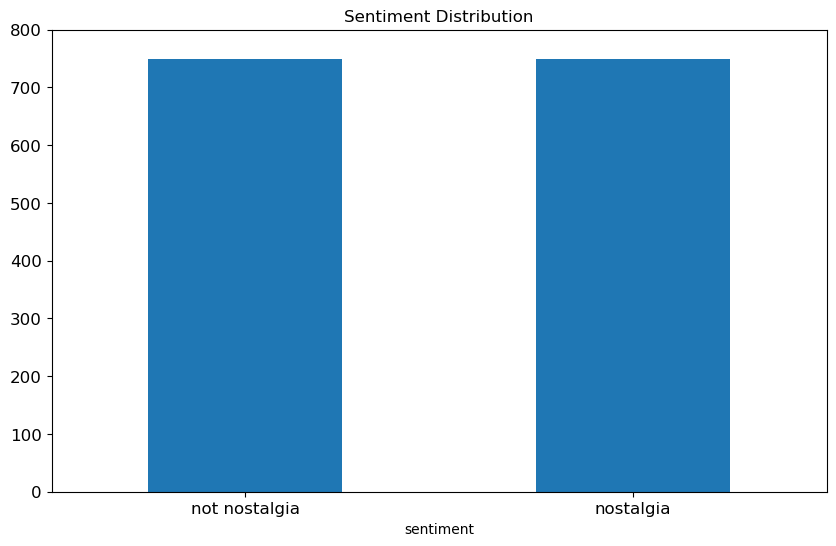

In [40]:
# Answer here
upper_bound = max(df['sentiment'].value_counts()) + 50  # Add 50 for better visualization

# Print the value counts for debugging
print(df['sentiment'].value_counts())

# Plot the bar chart for the 'sentiment' column
df['sentiment'].value_counts().plot(
    kind='bar',
    title='Sentiment Distribution',
    ylim=[0, upper_bound],  # Adjust the y-axis dynamically
    rot=0,
    fontsize=12,
    figsize=(10, 6)
)

# Display the plot
plt.show()

---

### >>> **Exercise 8:** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

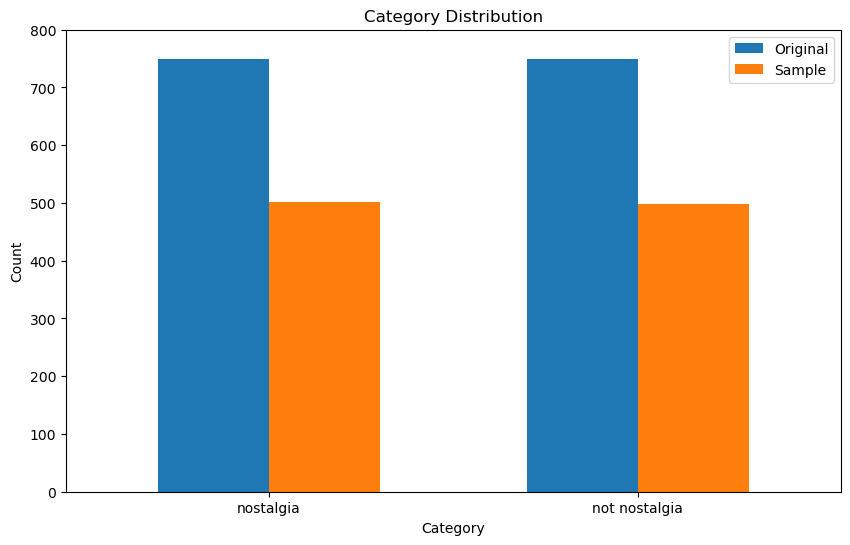

In [43]:
# Answer here
# Automate the ylim
upper_bound = max(X.category_name.value_counts() + 50)

# Calculate the category counts in the original and sampled dataframes
X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()

# Create a dataframe for comparison
comparison_df = pd.DataFrame({
    'Original': X_counts,
    'Sample': X_sample_counts
})

# Plotting the side-by-side bar chart
comparison_df.plot(kind='bar', 
                   title = 'Category Distribution', 
                   ylim = [0, upper_bound],
                   rot=0, 
                   figsize=(10, 6), width=0.6)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

---

### Feature Creation

In [46]:
import nltk

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

# The vecotrizer assigned the index because it's learning the vocabulary
# The first number "0" is the index of the document
# The second number represents the index of the word

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


### **>>> Exercise 9:**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [49]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?

analyze = count_vect.build_analyzer()
analyze(X.text[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---

Now let us look at the term-document matrix we built above.

In [52]:
# We can check the shape of this matrix by:
X_counts.shape

# 35788 means there are 35788 unique words in our document

(1500, 3730)

In [53]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [54]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [55]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [57]:
# Answer here
# Get the indices of the non-zero elements in the fifth record (row index 4)
non_zero_indices = X_counts[4].nonzero()[1]

# Get the corresponding words for these indices
words = [count_vect.get_feature_names_out()[index] for index in non_zero_indices]

# Print the words
print(words)

['to', 'his', 'of', 'him', 'songs', 'my', 'who', 'me', 'listening', 'reminds', 'mum', 'played', 'everyday']


---

### **>>> Exercise 11:** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

#### Answer here
##### Selecting a larger sample

In [61]:
# Select a larger sample of the matrix (e.g., 100 documents and 100 terms)
plot_z = X_counts[:100, :100].toarray()

# Update the plot_x and plot_y variables to reflect the new sample size
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[:100]]
plot_y = ["doc_" + str(i) for i in list(X.index)[:100]]

# Create a DataFrame from the selected sample
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

##### Plotting the heatmap

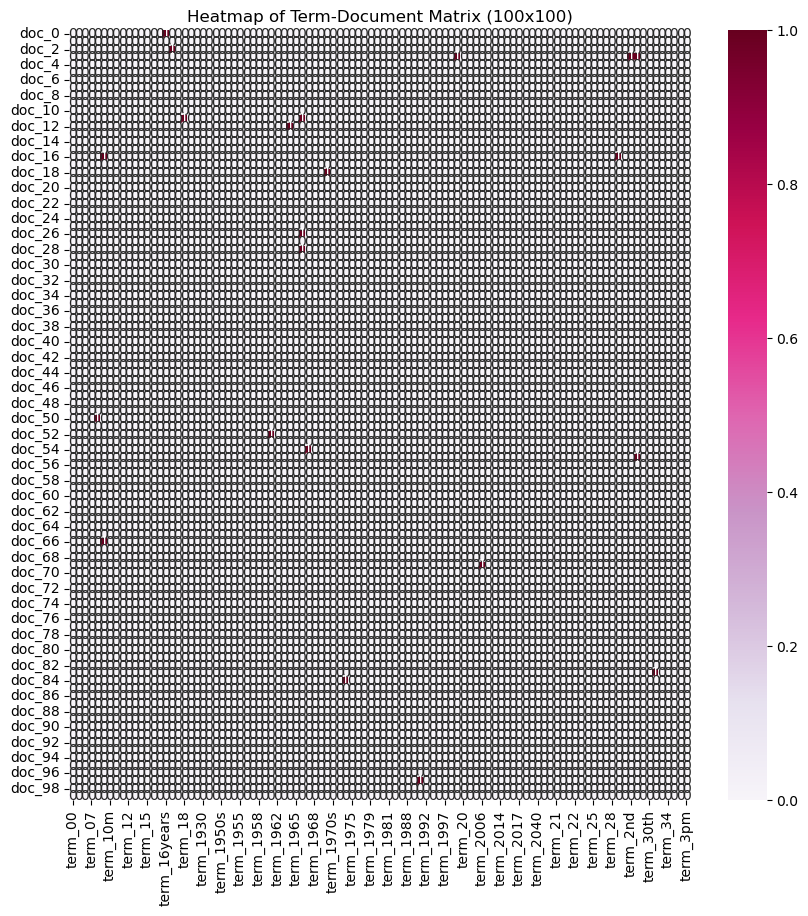

In [63]:
import seaborn as sns

plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

plt.title("Heatmap of Term-Document Matrix (100x100)")
plt.show()

---

#### Attribute Transformation / Aggregation

In [66]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [67]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 12:**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

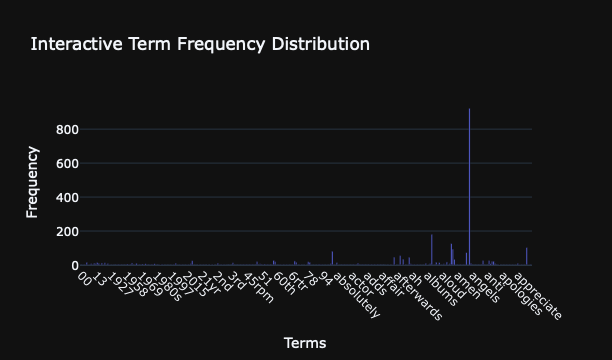

In [69]:
# Answer here
import plotly.express as px

# Prepare data for the interactive plot
term_data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],  # You can increase this range
    'Frequency': term_frequencies[:300]
})

# Create an interactive bar plot
fig = px.bar(
    term_data, 
    x='Term', 
    y='Frequency', 
    title='Interactive Term Frequency Distribution',
    labels={'Frequency': 'Frequency', 'Term': 'Term'},
    template='plotly_dark'  # Optional: adds a dark theme
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=45
)

# Show the plot
fig.show()

---

### >>> **Exercise 13:** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

#### Answer here
To efficiently reduce the number of terms you want to visualize, I can filter terms based on their frequency and visualize only the top N terms. 

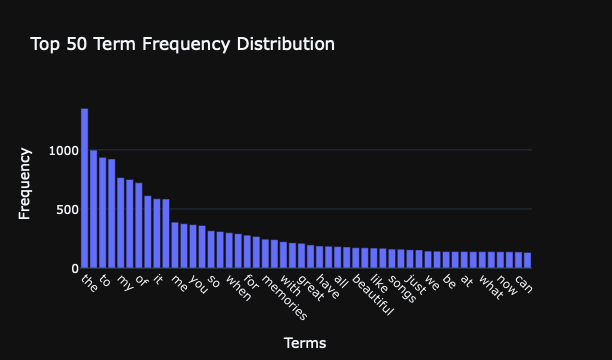

In [73]:
# Prepare a DataFrame with terms and their frequencies
term_data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Sort the terms by frequency in descending order
term_data = term_data.sort_values(by='Frequency', ascending=False)

# Select only the top N terms (e.g., top 50 terms)
N = 50  # You can change this to a smaller number for faster visualization
top_terms = term_data.head(N)

# Create an interactive bar plot for the top N terms
fig = px.bar(
    top_terms, 
    x='Term', 
    y='Frequency', 
    title=f'Top {N} Term Frequency Distribution',
    labels={'Frequency': 'Frequency', 'Term': 'Term'},
    template='plotly_dark'
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequency",
    xaxis_tickangle=45
)

# Show the plot
fig.show()

---

### >>> **Exercise 14:** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

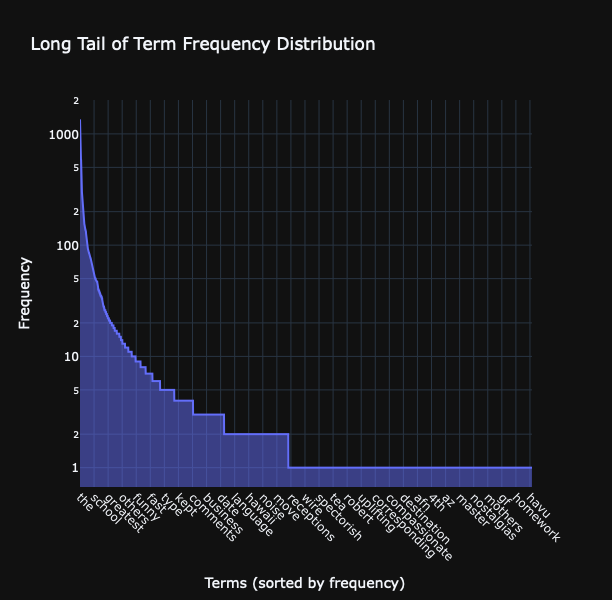

In [76]:
# Answer here
# Prepare DataFrame with all terms and their frequencies
term_data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Sort the DataFrame by frequency in descending order
term_data = term_data.sort_values(by='Frequency', ascending=False)

# Create an area plot for the long-tail distribution
fig = px.area(
    term_data,
    x='Term',
    y='Frequency',
    title='Long Tail of Term Frequency Distribution',
    labels={'Frequency': 'Frequency', 'Term': 'Term'},
    template='plotly_dark'
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Terms (sorted by frequency)",
    yaxis_title="Frequency",
    xaxis_tickangle=45,
    height=600
)

# Apply log scale to the y-axis
# To visualize the full spectrum of frequencies from high to low, a log scale on the y-axis can make the long tail more apparent.
# This helps highlight the terms with lower frequencies, which are otherwise compressed into a flat line when using a regular scale.
fig.update_yaxes(type="log")

# Show the plot
fig.show()

---

In [78]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

### >>> **Exercise 15:** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

#### Answer here
##### Apply Log Transformation

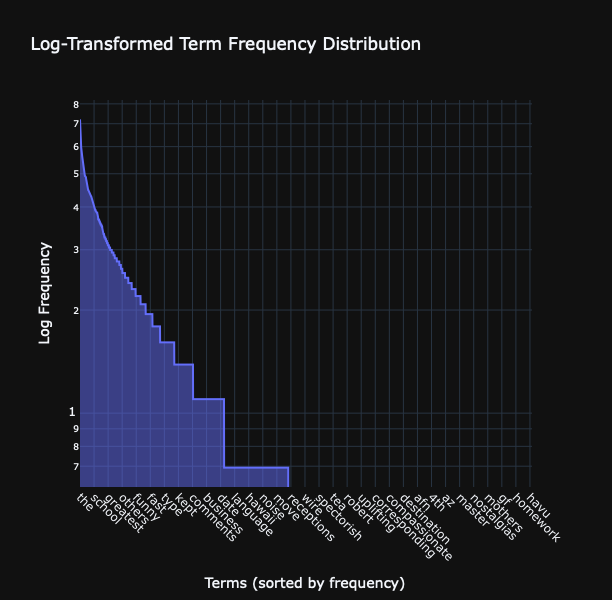

In [81]:
# Answer here
# Prepare DataFrame with all terms and their frequencies
term_data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Log Frequency': term_frequencies_log
})

# Sort the DataFrame by frequency in descending order
term_data = term_data.sort_values(by='Log Frequency', ascending=False)

# Create an area plot for the long-tail distribution
fig = px.area(
    term_data,
    x='Term',
    y='Log Frequency',
    title='Log-Transformed Term Frequency Distribution',
    labels={'Frequency': 'Log Frequency', 'Term': 'Term'},
    template='plotly_dark'
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Terms (sorted by frequency)",
    yaxis_title="Log Frequency",
    xaxis_tickangle=45,
    height=600
)

# Apply log scale to the y-axis
# To visualize the full spectrum of frequencies from high to low, a log scale on the y-axis can make the long tail more apparent.
# This helps highlight the terms with lower frequencies, which are otherwise compressed into a flat line when using a regular scale.
fig.update_yaxes(type="log")

# Show the plot
fig.show()

#### Observations of the Log-Transformed Distribution
1. **Compression of High Frequencies:**

The log scale compresses the large differences between high-frequency terms, making them appear closer together.

This reduces the visual dominance of the highest frequency terms and helps to show more details across the entire distribution.

In the linear plot, the “head” of the distribution is very pronounced, but in the log-transformed plot, the differences among the top terms are less apparent.

2. **Increased Visibility of the Long Tail:**

The log scale expands the lower frequencies, making the long tail more visible.

In the linear scale, terms in the long tail appeared nearly flat, but in the log-transformed plot, we can see the gradual decline in frequency more clearly.

3. **Representation of Low-Frequency Terms:**

Terms with lower frequencies are more distinguishable in the log-transformed plot, highlighting their presence and contribution to the overall distribution.

This reveals patterns that were less visible in the linear plot, especially the relative distriabution of rare terms.

---

#### FInding frequent patterns

In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame (per category) where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [86]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

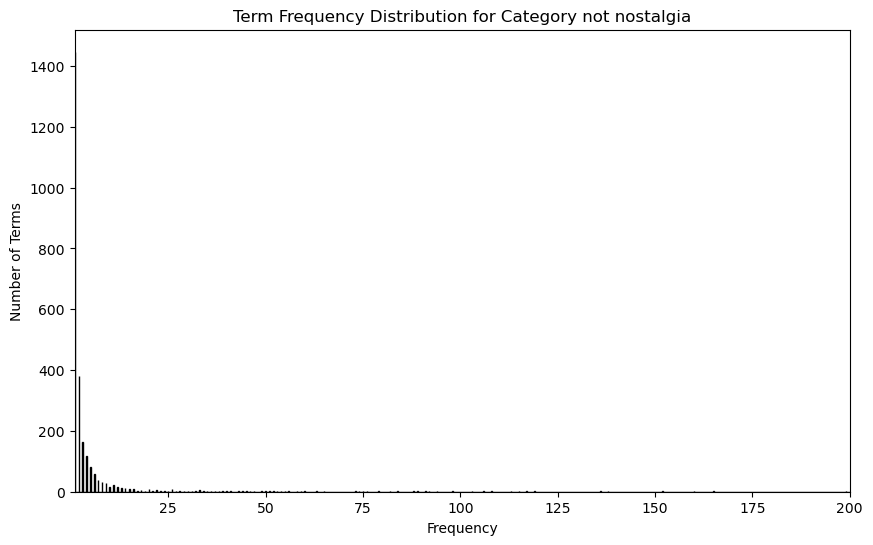

In [87]:
# Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [88]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

Here we can explore the frequencies of the **top 5%** words:

In [90]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 453, 451, ...,   1,   1,   1])

In [91]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0])

In [92]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

708

In [93]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


Here we can explore the frequencies of the **bottom 1%** words:

In [95]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 453, 708])

In [96]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [97]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

708

In [98]:
filt_term_document_dfs[categories[category_number]].loc[:,'milestone'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

1

Well done, now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. If you want to experiment after you complete the lab, you can return to try different percentages to filter, or not filter at all to do all the subsequent tasks for the pattern minings, and see if there is a significant change in the result.

In [100]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

### >>> **Exercise 16:** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

#### Answer here

##### **Top 5% Words:**
- Across all categories in the new dataset, common words like 'the', 'and', 'to', etc., remain frequent, as expected. These words are typical stopwords that do not provide category-specific information.
- However, some words in the top 5% are more indicative of the sentiment category:
  - For **'nostalgia'**, common words include terms like 'love', 'beautiful', 'music', 'memories', and 'song', reflecting the emotional tone often associated with nostalgic comments.
  - For **'not nostalgia'**, words such as 'time', 'life', 'world', 'people', and 'years' appear frequently, suggesting broader topics that aren't necessarily tied to nostalgic themes.
  - Despite this, the presence of stopwords still creates noise, which diminishes the potential signal that these high-frequency words could provide.

##### **Bottom 1% Words:**
- The bottom 1% words consist of less common terms, often typos, misspellings, or very specific phrases:
  - In **'nostalgia'**, the least frequent words include rare terms like 'millennium', 'milestone', 'miami', and 'melt', which may represent niche references in specific comments.
  - In **'not nostalgia'**, the bottom 1% includes words like 'montgomery', 'money', 'mock', and 'meta', which are rarely used and context-specific.
- These words often represent unique mentions that vary significantly between categories, capturing more specific, document-level details. They could be the result of spelling errors, very specific references, or words that occur only once or twice in the dataset.

##### **General Observations:**
- Filtering out both the **top 5%** and **bottom 1%** words helps reduce noise in the dataset:
  - **Top 5% words**: This filtering helps eliminate redundant stopwords, allowing us to focus on more category-specific terms. However, this step also removes some potentially meaningful words related to the sentiment in each category.
  - **Bottom 1% words**: Removing these words helps focus on more frequently used terms, reducing the noise created by rare, document-specific terms.
- The remaining words after filtering are likely to contribute more to meaningful sentiment differentiation:
  - **Nostalgia-specific terms** are more prevalent and better represented after filtering.
  - Similarly, **general terms in 'not nostalgia'** become clearer, making the remaining vocabulary more relevant for frequent pattern mining or sentiment classification.

---

In [104]:
# Importing the necessary modules for the conversion
from PAMI.extras.convert.DF2DB import DF2DB

# Update the list of categories to reflect the new dataset categories
categories = ['nostalgia', 'not nostalgia']

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace spaces with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace(' ', '_')
    
    # Create the DF2DB object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    # Convert to transactional database and save to CSV file
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


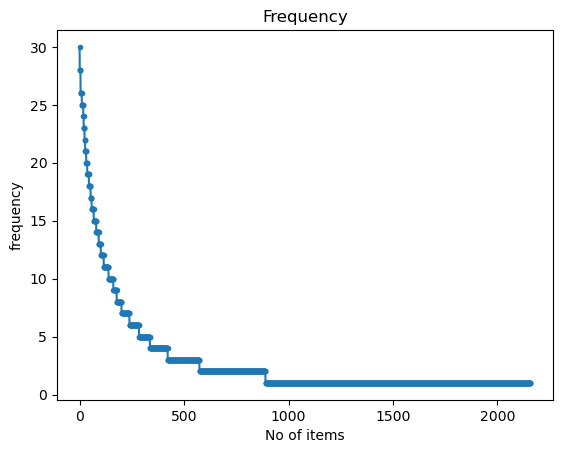

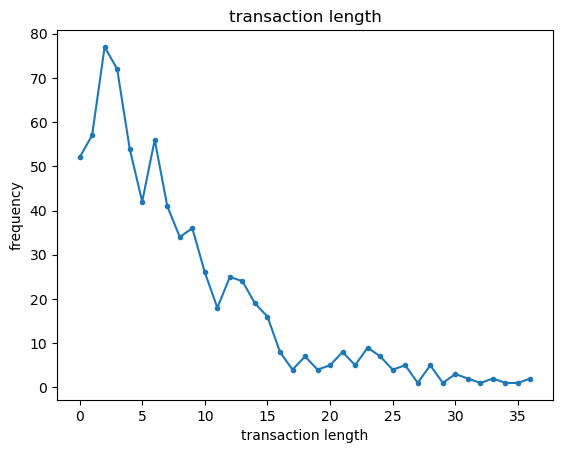

In [105]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

# Adjust the filename to match the category in the new dataset
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')

# Run the database analysis
obj.run()
obj.printStats()
obj.plotGraphs()

# The database size is the number of documents
# The number of items is the number of words

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.4541698904223
Sparsity : 0.9965649449010148


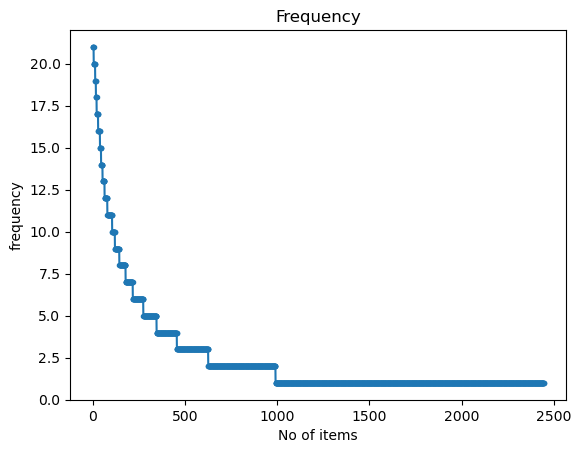

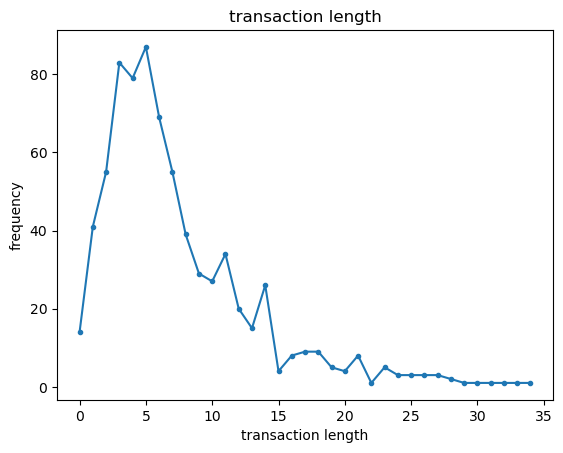

In [106]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

# Adjust the filename to match the category in the new dataset
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')

# Run the database analysis
obj.run()
obj.printStats()
obj.plotGraphs()

# The database size is the number of documents
# The number of items is the number of words

In [107]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Set the minimum support threshold
minSup = 9

# Adjust the filename to match the 'nostalgia' category in the new dataset
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)

# Run the FP-Growth algorithm
obj1.mine()

# Get the resulting frequent patterns as a DataFrame
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()

# Print the total number of patterns
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia)))

# Measure and print the runtime
print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.0037598609924316406


In [108]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [109]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# Set the minimum support threshold
minSup = 9

# Adjust the filename to match the 'not nostalgia' category in the new dataset
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)

# Run the FP-Growth algorithm
obj2.mine()

# Get the resulting frequent patterns as a DataFrame
frequentPatternsDF_not_nostalgia = obj2.getPatternsAsDataFrame()

# Print the total number of patterns
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia)))

# Measure and print the runtime
print('Runtime: ' + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.00437617301940918


In [110]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [111]:
import pandas as pd

# Group together all the DataFrames related to the found patterns for the new categories
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all DataFrames
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one DataFrame
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)

# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered DataFrames into a final DataFrame
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)

# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [112]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1500 rows x 3950 columns]

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the **'nostalgia'** category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [114]:
from PAMI.frequentPattern.topk.FAE import FAE
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth

In [171]:
# File path for 'nostalgia' transactional data
iFile = 'td_freq_db_nostalgia.csv'

# ==========================
# Run FAE Top-K
# ==========================
k_values = [200, 400, 600]

for k in k_values:
    print(f"\nFAE Top-K with k={k}")
    # Instantiate the FAE_TopK algorithm for 'nostalgia'
    obj = FAE(iFile=iFile, k=k)
    obj.mine()
    
    # Get the results as a DataFrame
    patterns_df = obj.getPatternsAsDataFrame()
    print(f"Total patterns: {len(patterns_df)}")
    print(f"Runtime: {obj.getRuntime()} seconds")
    
    # Save the results
    obj.save(f'fae_topk_nostalgia_k{k}.txt')
    print(patterns_df.head())

# ==========================
# Run MaxFPGrowth
# ==========================
minSup_values = [3, 6, 9]

for minSup in minSup_values:
    print(f"\nMaxFPGrowth with minSup={minSup}")
    # Instantiate the MaxFPGrowth algorithm for 'nostalgia'
    obj = MaxFPGrowth(iFile=iFile, minSup=minSup)
    obj.mine()
    
    # Get the results as a DataFrame
    patterns_df = obj.getPatternsAsDataFrame()
    print(f"Total patterns: {len(patterns_df)}")
    print(f"Runtime: {obj.getRuntime()} seconds")
    
    # Save the results
    obj.save(f'maxfp_nostalgia_minSup{minSup}.txt')
    print(patterns_df.head())


FAE Top-K with k=200
 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns: 200
Runtime: 0.007455110549926758 seconds
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28

FAE Top-K with k=400
 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns: 400
Runtime: 0.019257068634033203 seconds
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28

FAE Top-K with k=600
 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns: 600
Runtime: 0.051798105239868164 seconds
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28

MaxFPGrowth with minSup=3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns: 682
Runtime: 0.008188962936401367 se

#### **Summary for Exercise 17**

##### 1. FAE Top-K Algorithm Results

##### Total Patterns:
  - **k=200:** 200 patterns
  - **k=400:** 400 patterns
  - **k=600:** 600 patterns

##### Runtime:
  - **k=200:** 0.0075 seconds
  - **k=400:** 0.0193 seconds
  - **k=600:** 0.0518 seconds

##### Observation:
  - As expected, increasing the value of *k* leads to more patterns being extracted and a longer runtime.
  - The algorithm generates a fixed number of top-*k* frequent patterns, with the highest support patterns appearing first.
  - The runtime increase remains linear, indicating that FAE Top-K scales efficiently with larger *k* values, even for a different dataset.

#### 2. MaxFPGrowth Algorithm Results

##### Total Patterns:
  - **minSup=3:** 682 patterns
  - **minSup=6:** 274 patterns
  - **minSup=9:** 176 patterns

##### Runtime:
  - **minSup=3:** 0.0082 seconds
  - **minSup=6:** 0.0049 seconds
  - **minSup=9:** 0.0035 seconds

##### Observation:
  - As the minimum support threshold (**minSup**) increases, the total number of patterns decreases significantly, while runtime decreases proportionally.
  - Patterns with higher support are fewer and are extracted more quickly, demonstrating that MaxFPGrowth remains efficient even with the new dataset.

#### Comparison with FP-Growth Algorithm

##### 1. Pattern Extraction
- **FP-Growth** extracts all frequent patterns meeting the minimum support criteria, while **FAE Top-K** extracts only the top *k* patterns, and **MaxFPGrowth** extracts only maximal patterns.
- The results show that **FAE Top-K** and **MaxFPGrowth** provide more specific patterns, whereas **FP-Growth** would cover a broader set.

##### 2. Performance
- Both **FAE Top-K** and **MaxFPGrowth** were faster than **FP-Growth** for this dataset. 
  - **FAE Top-K** has a very short runtime due to the reduced *k* values.
  - **MaxFPGrowth** demonstrated quicker runtimes for increased **minSup** values, confirming its efficiency.

##### 3. Similarities
- All algorithms identify frequent patterns, but their focus differs:
  - **FAE Top-K** targets the top *k* frequent patterns.
  - **MaxFPGrowth** extracts maximal patterns.
  - **FP-Growth** would identify all frequent patterns.

#### Findings

- **FAE Top-K** is ideal when extracting a fixed number of patterns, as it efficiently focuses on the top patterns regardless of minimum support.
- **MaxFPGrowth** effectively finds the most representative patterns while avoiding redundant subsets, making it useful for concise pattern discovery.
- **FP-Growth** would still be comprehensive but is less efficient compared to the other algorithms, given the need for full pattern extraction.

#### Final Documentation

- The **FAE Top-K** algorithm remains beneficial for scenarios where only the top patterns are needed.
- The **MaxFPGrowth** algorithm is well-suited for identifying key patterns without redundant subsets.
- The **FP-Growth** algorithm provides a comprehensive pattern extraction, albeit with longer runtimes.

---

### Dimensionality Reduction

### >>> **Exercise 18:**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

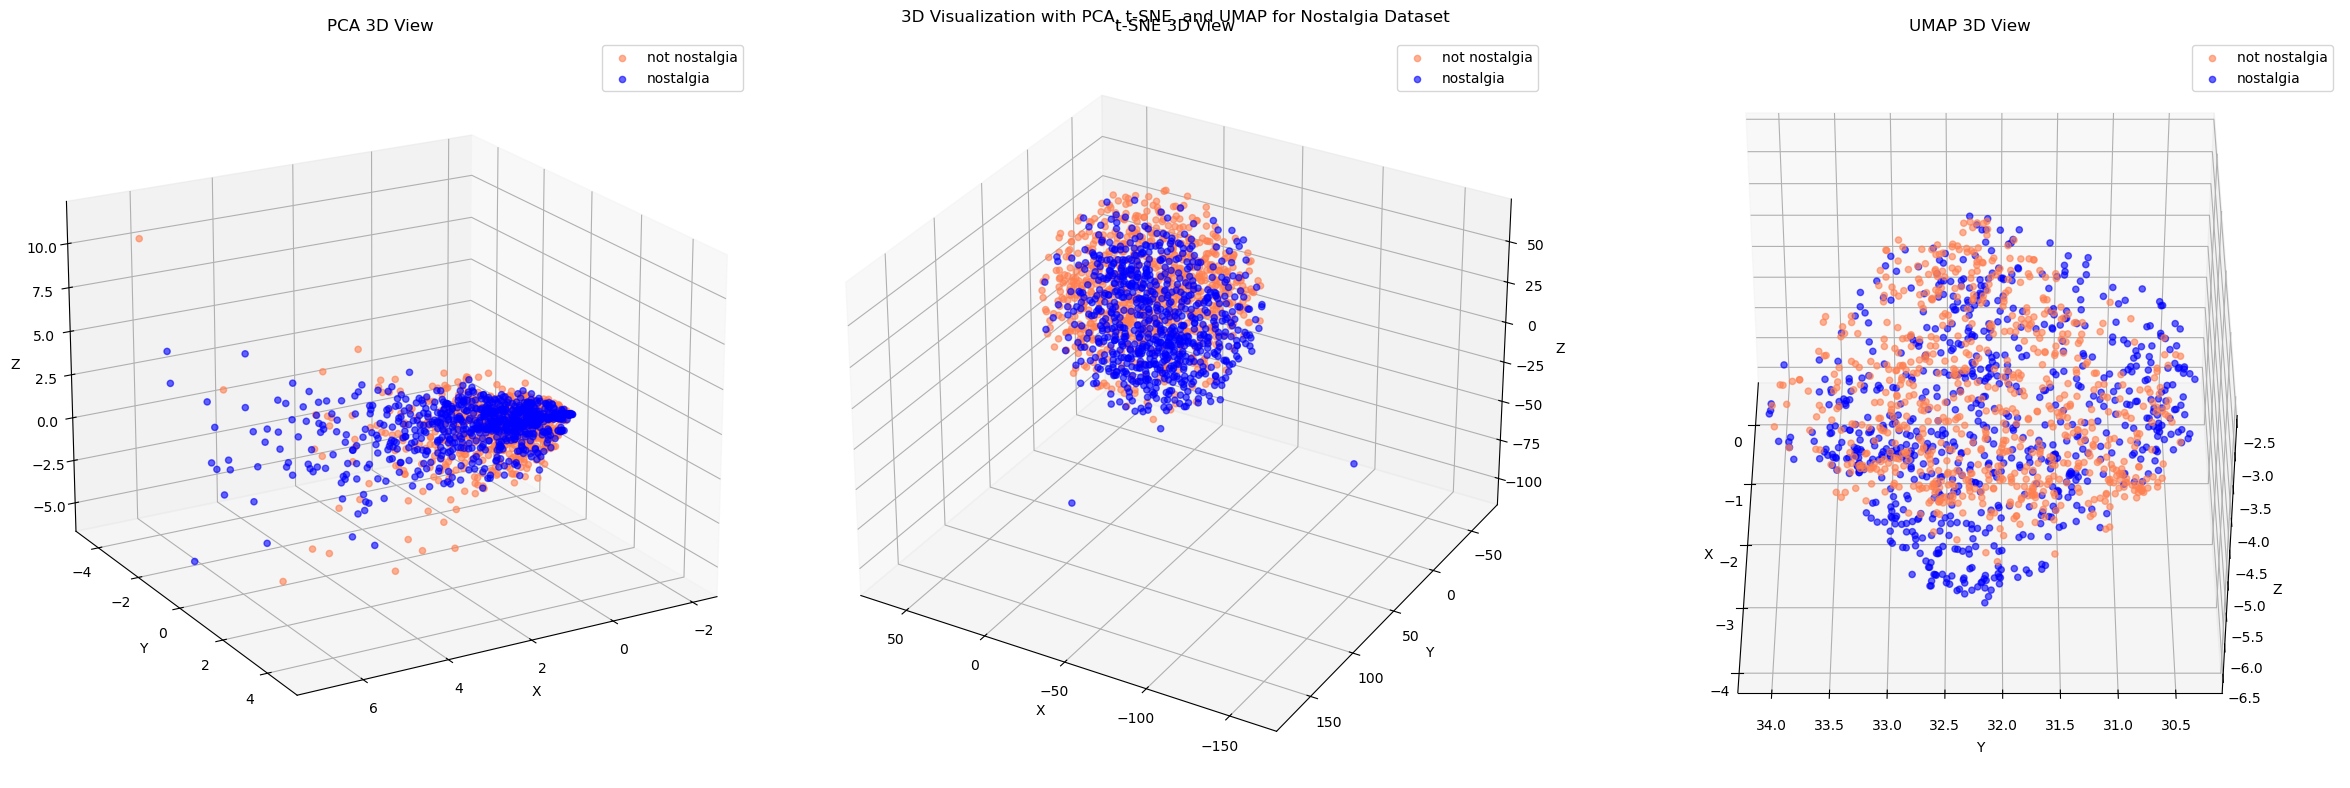

In [181]:
# Answer here
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Apply 3D dimensionality reduction to the new dataset
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Step 2: Define colors and categories for plotting
col = ['coral', 'blue']
categories = X['category_name'].unique()

# Step 3: Define a function to create 3D scatter plots
def plot_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, label=category, alpha=0.6)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)  # Set camera angle
    ax.legend(loc='upper right')

# Step 4: Plot the results
fig = plt.figure(figsize=(24, 8))

# Plot PCA 3D with different camera angles
ax1 = fig.add_subplot(131, projection='3d')
plot_3d(ax1, X_pca_3d, 'PCA 3D View', elev=20, azim=60)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d(ax2, X_tsne_3d, 't-SNE 3D View', elev=30, azim=120)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d(ax3, X_umap_3d, 'UMAP 3D View', elev=40, azim=180)

plt.suptitle('3D Visualization with PCA, t-SNE, and UMAP for Nostalgia Dataset')
plt.tight_layout()
plt.show()

#### Observations from 3D Visualization

1. **Clustering Patterns:**
   - In the **PCA 3D View**, there is minimal separation between the 'nostalgia' and 'not nostalgia' categories. The clusters are somewhat intermixed, indicating that PCA does not offer strong dimensional separation for this dataset.
   - In the **t-SNE 3D View**, the separation is slightly improved, with clearer clustering, but still some overlap between the categories. This suggests that t-SNE captures some meaningful features for clustering, although it's not fully effective in isolating the categories.
   - The **UMAP 3D View** shows a more compact distribution of the 'nostalgia' category compared to 'not nostalgia', with both categories showing significant overlap. UMAP captures dense clustering but still struggles to fully differentiate between the two categories.

2. **Impact of Camera Angles:**
   - Adjusting the camera angles in 3D plots offers better visibility of the category distribution and provides more clarity about the relative positioning of clusters.
   - For all three dimensionality reduction methods, viewing from different angles helps highlight the density and spread of data points, revealing areas of overlap or potential separations that are not as clear in 2D visualizations.

3. **General Findings:**
   - Overall, the 3D projections do not show distinct separation between the 'nostalgia' and 'not nostalgia' categories, suggesting that the categories have overlapping features in this dataset.
   - t-SNE and UMAP provide slightly better clustering than PCA, as seen in the tighter distribution of data points, but no method offers a complete separation.

4. **Recommendation for Further Analysis:**
   - Consider using more advanced methods or feature engineering to better separate the categories, as the current dimensionality reduction techniques only offer partial clarity.
   - Additionally, combining 3D plots with other clustering algorithms (e.g., k-means or DBSCAN) may help in identifying potential boundaries between the categories.

---

### Discretization and Binarization

### >>> **Exercise 19:**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [190]:
# Answer here
from sklearn.preprocessing import LabelBinarizer

# Initialize the LabelBinarizer
lb = LabelBinarizer()

# Fit the binarizer to the 'category_name' column
lb.fit(X['category_name'])

# Transform the 'category_name' column and add the result as a new column
X['bin_category_name'] = lb.transform(X['category_name']).tolist()

# Display the first few rows to verify the transformation
X[['category_name', 'bin_category_name']].head(10)

category_name bin_category_name
0  not nostalgia               [1]
1      nostalgia               [0]
2      nostalgia               [0]
3  not nostalgia               [1]
4      nostalgia               [0]
5      nostalgia               [0]
6      nostalgia               [0]
7      nostalgia               [0]
8  not nostalgia               [1]
9  not nostalgia               [1]

It works!

---

## Part 3. Attempt the following tasks on the new dataset

### 1. Generate meaningful new data visualizations

I tend to  focus on uncovering key insights by exploring various aspects like word frequency, sentiment distribution, category correlation, and more. 

#### 1. Word Cloud

- **Purpose**: To highlight the most frequent words used in 'nostalgia' and 'not nostalgia' comments, giving a visual representation of common words in each category.
- **Explanation**: Word clouds emphasize words that appear more frequently, providing quick insights into the most discussed topics or sentiments.
- **Implementation**:
  - Generate separate word clouds for each category.
  - Display the words with sizes proportional to their frequencies.


In [201]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

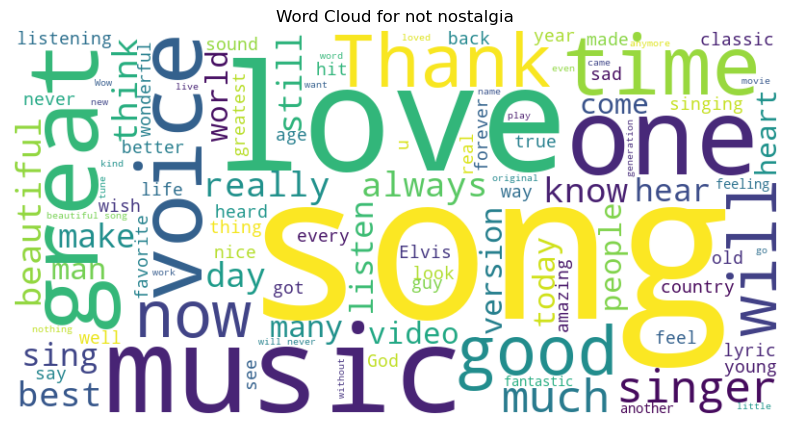

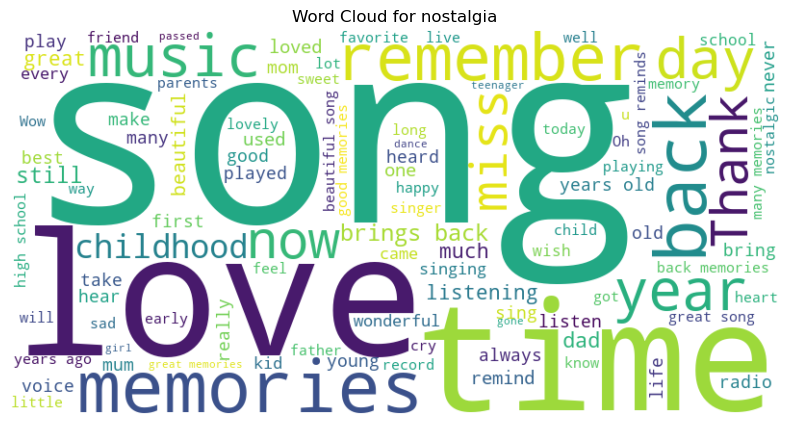

In [219]:
# Word Cloud for 'nostalgia' and 'not nostalgia'
for category in X['category_name'].unique():
    text_data = " ".join(X[X['category_name'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()

#### 2. Sentiment Distribution Histogram

- **Purpose**: To show the distribution of sentiment scores (if available) or the count of 'nostalgia' vs 'not nostalgia' comments.
- **Explanation**: Histograms help visualize the distribution of sentiment scores, making it easier to understand whether there is a skew in the data towards a particular sentiment.
- **Implementation**:
  - Plot a histogram showing the number of comments in each sentiment category.


/var/folders/h0/dm6c6t1j12qgrslwtbhvywcr0000gn/T/ipykernel_11430/139392360.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




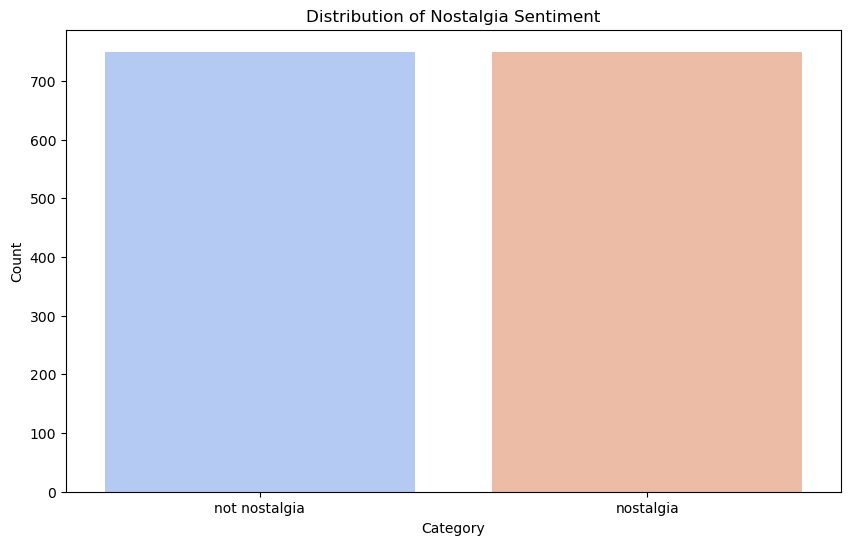

In [221]:
# Sentiment Distribution Histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='category_name', palette='coolwarm')
plt.title('Distribution of Nostalgia Sentiment')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#### 3. Top N Frequent Words Bar Plot

- **Purpose**: To identify the most common words used in each sentiment category.
- **Explanation**: A bar plot of the top N most frequent words provides a clear representation of word usage patterns across sentiments.
- **Implementation**:
  - Count the frequency of words in each category.
  - Plot the top 20 words using a bar plot.

/var/folders/h0/dm6c6t1j12qgrslwtbhvywcr0000gn/T/ipykernel_11430/432361403.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




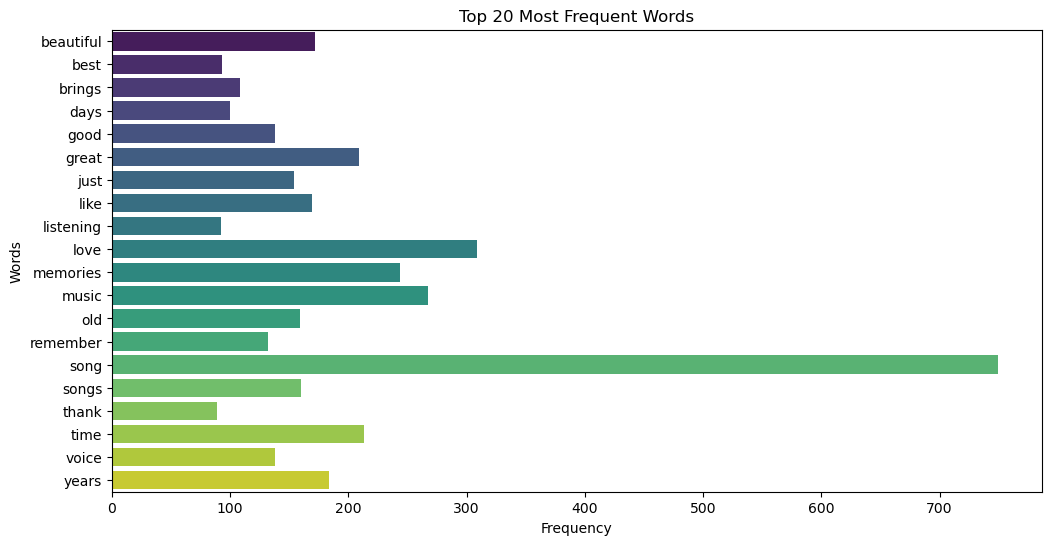

In [223]:
# Top N Frequent Words Bar Plot
from sklearn.feature_extraction.text import CountVectorizer

# Create term-document matrix
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X_counts = vectorizer.fit_transform(X['text'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X_counts.toarray().sum(axis=0)))

# Plot top 20 words
plt.figure(figsize=(12, 6))
sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

#### 4. TSNE/UMAP 2D Plot with Color Coding

- **Purpose**: To observe clustering and separability between 'nostalgia' and 'not nostalgia' categories using dimensionality reduction.
- **Explanation**: 2D projections from t-SNE or UMAP can reveal clusters and relationships between data points, helping to understand how well the two categories are separated in lower-dimensional space.
- **Implementation**:
  - Apply t-SNE or UMAP to reduce the dimensionality to 2.
  - Plot the reduced dimensions with different colors representing each category.

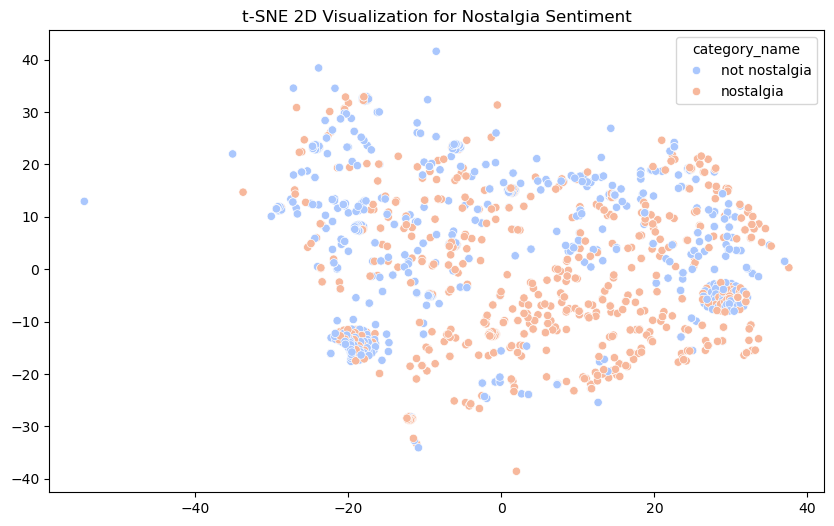

In [225]:
# 2D t-SNE Plot with Color Coding
from sklearn.manifold import TSNE

X_tsne_2d = TSNE(n_components=2).fit_transform(X_counts.toarray())
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_2d[:, 0], y=X_tsne_2d[:, 1], hue=X['category_name'], palette='coolwarm')
plt.title('t-SNE 2D Visualization for Nostalgia Sentiment')
plt.show()

#### 5. Bar Plot for Average Comment Length by Category

- **Purpose**: To compare the average length of comments in 'nostalgia' vs 'not nostalgia' categories.
- **Explanation**: This analysis can reveal whether nostalgic comments tend to be longer or shorter than non-nostalgic comments.
- **Implementation**:
  - Calculate the average number of words per comment for each category.
  - Plot the averages using a bar plot.


/var/folders/h0/dm6c6t1j12qgrslwtbhvywcr0000gn/T/ipykernel_11430/4231511402.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




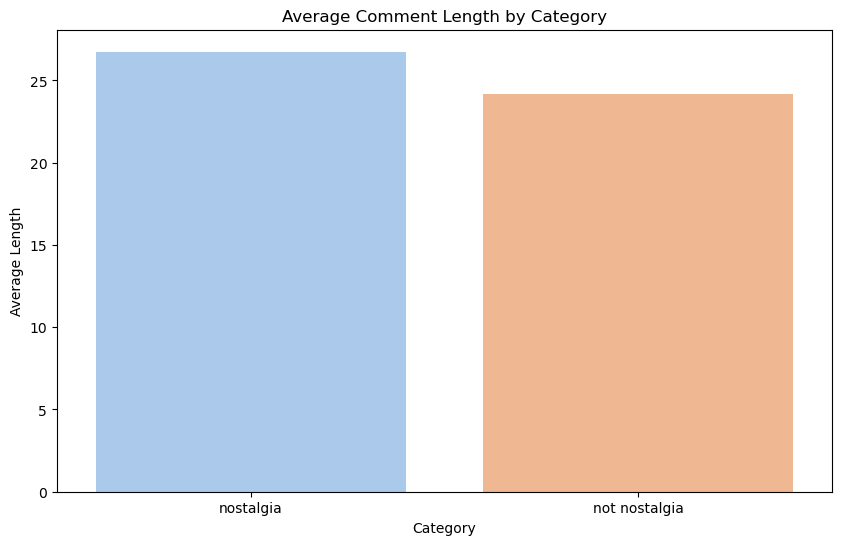

In [227]:
# Bar Plot for Average Comment Length
X['comment_length'] = X['text'].apply(lambda x: len(x.split()))
avg_length = X.groupby('category_name')['comment_length'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_length.index, y=avg_length.values, palette='pastel')
plt.title('Average Comment Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Length')
plt.show()

#### 6. Correlation Heatmap for Word Occurrences

- **Purpose**: To identify which words often co-occur in the dataset and their correlation with 'nostalgia' or 'not nostalgia'.
- **Explanation**: A heatmap showing correlations between word occurrences can help identify patterns in word usage.
- **Implementation**:
  - Create a term-document matrix.
  - Calculate the correlation between words.
  - Plot a heatmap using the correlation matrix.


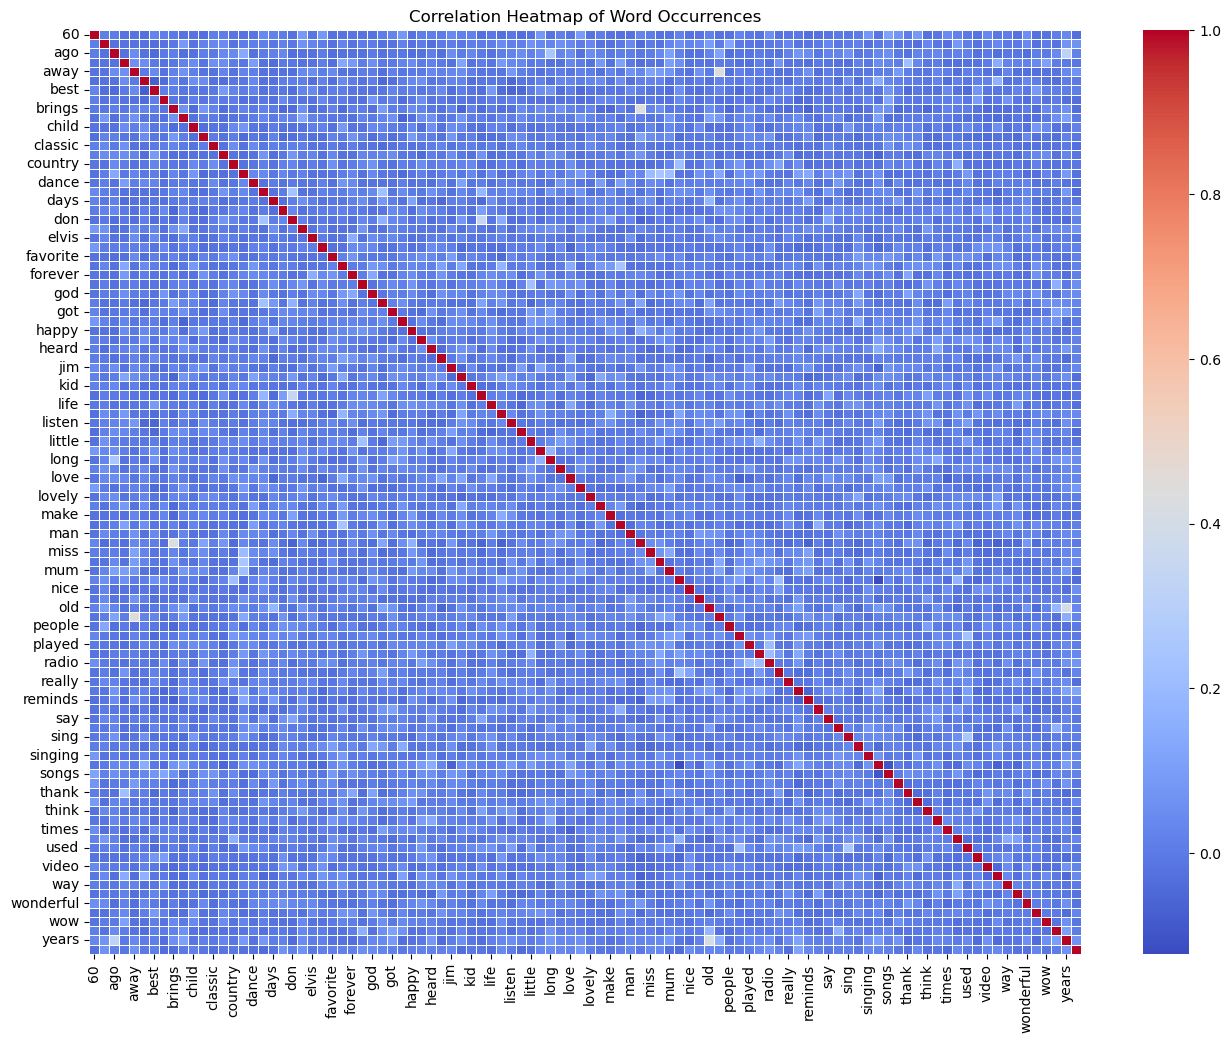

In [229]:
from sklearn.feature_extraction.text import CountVectorizer

# Create term-document matrix
vectorizer = CountVectorizer(max_features=100, stop_words='english')
X_tdm = vectorizer.fit_transform(X['text'])

# Convert to DataFrame
terms = vectorizer.get_feature_names_out()
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms)

# Calculate the correlation matrix
correlation_matrix = tdm_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Word Occurrences')
plt.show()

#### 7. Boxplot for Sentiment Score Distribution (if applicable)

- **Purpose**: To display the distribution of sentiment scores within each category, highlighting median, quartiles, and potential outliers.
- **Explanation**: Boxplots can provide insights into the spread and central tendency of sentiment scores in each category.
- **Implementation**:
  - Calculate sentiment scores (if available).
  - Create boxplots for each sentiment category.

/var/folders/h0/dm6c6t1j12qgrslwtbhvywcr0000gn/T/ipykernel_11430/3067227308.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




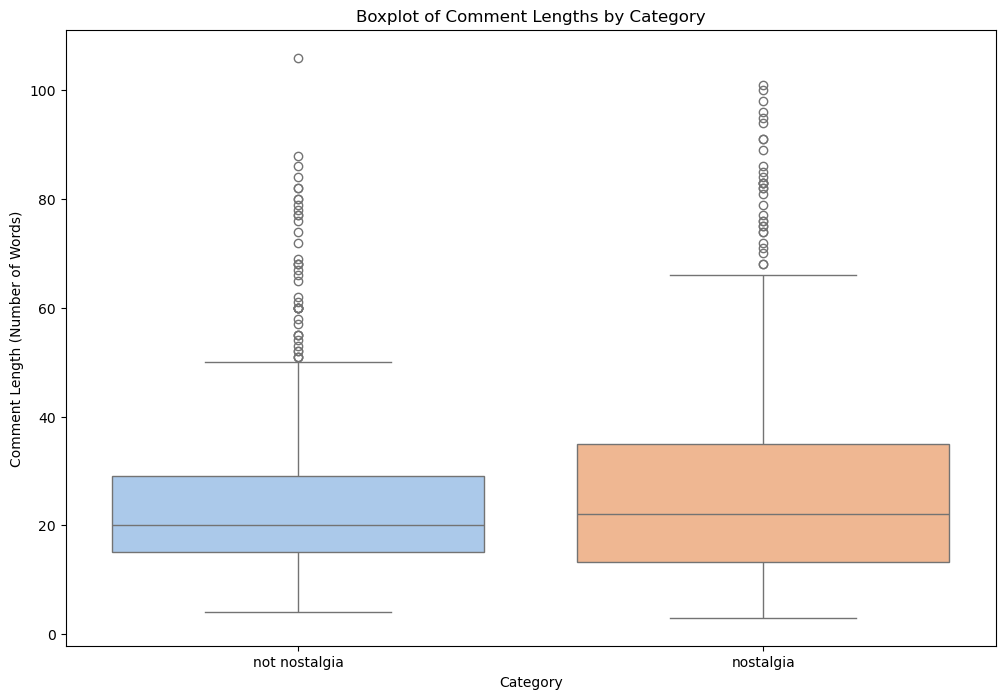

In [231]:
# Calculate comment length (number of words in each comment)
X['comment_length'] = X['text'].apply(lambda x: len(x.split()))

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, x='category_name', y='comment_length', palette='pastel')
plt.title('Boxplot of Comment Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Comment Length (Number of Words)')
plt.show()

### 2. Generate TF-IDF features from the tokens of each text

In [234]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the 'text' column to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(X['text'])

# Convert the matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first 10 rows of the TF-IDF matrix
tfidf_df.head(10)

10  100   11   12   13   14   15   16        17   18  ...  yeah  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.183999  0.0  ...   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   

      years  yes  yesterday  young  younger  youth  youtube  yrs  
0  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
1  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
2  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
3  0.092282  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
4  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
5  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
6  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
7  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
8  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  
9  0.000000  0.0        0.0    0.0      0.0    0.0      0.0  0.0  

[10 rows x 1000 columns]

### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories

To implement the Naive Bayes classifier using both **TF-IDF features** and **word frequency features**, I will create two separate models:

1. Word Frequency Model: This model will use the document-term frequency matrix (as shown in the Master Notebook).
2. TF-IDF Model: This model will use the TF-IDF representation of the text data.

In [239]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare the data
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train_tdm, X_test_tdm, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_df, X['category'], test_size=0.3, random_state=42)

# Step 2: Word Frequency Model
print("Model with Document-Term Frequency Data")
# Initialize MultinomialNB for word frequency
nb_classifier_tdm = MultinomialNB()
# Train the Naive Bayes classifier
nb_classifier_tdm.fit(X_train_tdm, y_train)
# Make predictions on the test set
y_pred_tdm = nb_classifier_tdm.predict(X_test_tdm)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_tdm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tdm, target_names=target_names, digits=4))

# Step 3: TF-IDF Model
print("\nModel with TF-IDF Features")
# Initialize BernoulliNB for TF-IDF (suitable for binary/boolean features)
nb_classifier_tfidf = BernoulliNB()
# Train the Naive Bayes classifier
nb_classifier_tfidf.fit(X_train_tfidf, y_train)
# Make predictions on the test set
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

Model with Document-Term Frequency Data
Accuracy: 0.84

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8462    0.8311    0.8386       225
    nostalgia     0.8341    0.8489    0.8414       225

     accuracy                         0.8400       450
    macro avg     0.8401    0.8400    0.8400       450
 weighted avg     0.8401    0.8400    0.8400       450


Model with TF-IDF Features
Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8802    0.8489    0.8643       225
    nostalgia     0.8541    0.8844    0.8690       225

     accuracy                         0.8667       450
    macro avg     0.8671    0.8667    0.8666       450
 weighted avg     0.8671    0.8667    0.8666       450



In the implementation, I used:

- **Multinomial Naive Bayes (MultinomialNB) for word frequency features.**
  - This is the same classifier as in the Master Notebook, which is suitable for count-based features like document-term frequency.

- **Bernoulli Naive Bayes (BernoulliNB) for TF-IDF features.**
  - This choice is different from the Master Notebook, as BernoulliNB is more suitable for handling binary or normalized features like TF-IDF.
  - TF-IDF values can be interpreted as the presence or absence of words, aligning well with BernoulliNB’s assumption of binary features.

The decision to use **BernoulliNB** for TF-IDF features was based on the need to adapt the Naive Bayes classifier to the nature of the TF-IDF representation, which represents relative importance rather than raw counts.

#### Model Comparison: Document-Term Frequency vs. TF-IDF

##### 1. Model with Document-Term Frequency Data

- **Accuracy**: 0.84
- **Precision, Recall, F1-Score**:
  - **Not Nostalgia**:
    - Precision: 0.8462
    - Recall: 0.8311
    - F1-Score: 0.8386
    - Support: 225
  - **Nostalgia**:
    - Precision: 0.8341
    - Recall: 0.8489
    - F1-Score: 0.8414
    - Support: 225
- **Overall**:
  - Macro Average: 0.8401 precision, 0.8400 recall, 0.8400 F1-score
  - Weighted Average: 0.8401 precision, 0.8400 recall, 0.8400 F1-score

##### 2. Model with TF-IDF Features

- **Accuracy**: 0.87
- **Precision, Recall, F1-Score**:
  - **Not Nostalgia**:
    - Precision: 0.8802
    - Recall: 0.8489
    - F1-Score: 0.8643
    - Support: 225
  - **Nostalgia**:
    - Precision: 0.8541
    - Recall: 0.8844
    - F1-Score: 0.8690
    - Support: 225
- **Overall**:
  - Macro Average: 0.8671 precision, 0.8667 recall, 0.8666 F1-score
  - Weighted Average: 0.8671 precision, 0.8667 recall, 0.8666 F1-score

#### Key Observations:

1. **Accuracy Improvement**: 
   - The TF-IDF model shows a noticeable improvement in accuracy (0.87) compared to the document-term frequency model (0.84).

2. **Precision and Recall**:
   - The TF-IDF model achieves higher precision, recall, and F1-scores across both sentiment categories. It performs particularly well in identifying 'nostalgia', with higher recall (0.8844) than the document-term frequency model.

3. **Performance Implications**:
   - The TF-IDF model generally captures the importance of words more effectively by considering not only the frequency of words but also their relative importance across documents. This helps in distinguishing between categories better.
   - TF-IDF’s normalization helps in reducing the impact of very common words, leading to a more focused model that identifies key terms more accurately.

4. **MultinomialNB vs. BernoulliNB**:
   - The Multinomial Naive Bayes (used with document-term frequency) is designed for count-based features, making it

---

## Part 4. Those inefficent parts I noticed in the Lab 1?

#### Inefficiencies and Improvements in Lab 1 Master File

##### Observed Inefficiencies and Improvements

##### 1. Data Loading and Preparation
- **Inefficiency**: 
  - Data loading is typically done without considering memory constraints, which can be problematic for large datasets.
- **Improvement**: 
  - Implement efficient data loading by using chunks (`chunksize` parameter) when reading large files with pandas (e.g., `pd.read_csv`). This approach reduces memory usage and processing time.

##### 2. Handling Missing Values
- **Inefficiency**: 
  - Missing value treatment is often performed with simple imputation techniques (e.g., filling with mean, mode, or constant values).
- **Improvement**: 
  - Consider more sophisticated imputation methods, such as KNN-based or iterative imputation, which are more accurate for handling missing values in numerical and categorical columns.

##### 3. Duplicate Data Removal
- **Inefficiency**: 
  - The removal of duplicate data may be done without prior analysis of the impact on the dataset.
- **Improvement**: 
  - Implement exploratory data analysis (EDA) to understand the nature and distribution of duplicates, helping to decide whether removal is necessary or if duplicates contribute to useful patterns.

##### 4. Sampling
- **Inefficiency**: 
  - Random sampling methods may not account for class imbalances in the dataset.
- **Improvement**: 
  - Use **stratified sampling** to ensure that the sample maintains the same distribution of target classes, which can improve model training performance and accuracy.

##### 5. Dimensionality Reduction
- **Inefficiency**: 
  - PCA and other dimensionality reduction methods may be applied without considering feature importance.
- **Improvement**: 
  - Conduct feature selection using statistical methods or models like RandomForest or Lasso Regression before applying dimensionality reduction. This step ensures that the most relevant features are retained and computational resources are used efficiently.

##### 6. Discretization and Binarization
- **Inefficiency**: 
  - Binning or discretization is applied uniformly across all features, which can lead to a loss of important information.
- **Improvement**: 
  - Use data-driven binning methods, like decision tree-based binning or quantile-based binning, to create bins that better represent the distribution of the data.

##### 7. TF-IDF and Word Frequency Features
- **Inefficiency**: 
  - Both TF-IDF and word frequency matrices can be sparse, resulting in inefficient storage and processing.
- **Improvement**: 
  - Implement **dimensionality reduction** on the term-document matrix before model training (e.g., truncated SVD or selecting top N features by variance) to reduce sparsity.

##### 8. Model Training
- **Inefficiency**: 
  - The default hyperparameters of the Naive Bayes models may not be optimal.
- **Improvement**: 
  - Use grid search or randomized search for hyperparameter tuning to optimize model performance.

##### 9. Data Exploration
- **Inefficiency**: 
  - Visualizations and exploration are often basic and may not reveal deeper insights.
- **Improvement**: 
  - Incorporate more advanced visualization techniques (e.g., word clouds, interactive plots, and clustering visualizations) to better understand data patterns and distributions.

These suggestions can make the data preprocessing more robust, meaningful, and efficient, ultimately improving the model's performance and accuracy.

---